# #1. 머신러닝 실습1 : RDKit

RDKit을 사용하여 머신러닝 모델을 학습시키고, 정확도를 평가해보았습니다.
- 데이터를 훈련/테스트 세트로 나누는 법 학습
- 여러 모델을 학습시키고 예측
- 정확도 평가 및 해석


In [16]:
#1. 데이터 준비
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)#또는 `df = pd.read_csv('파일경로')`로 csv 파일 업로드 
df['target'] = iris.target
X = df.drop('target', axis=1)  # 특성 입력값. drop 은 'target' 열을 삭제하겠다. axis=1 은 열을 기준으로 지정.
y = df['target']               # 정답
print("missing values: ",df.isnull().sum())#결측치 확인

missing values:  sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
#데이터 확인
print("df table: ",df.head(3))#데이터 확인. head(n) 디폴트값은 5행.
print("X table: ",X.head(3))
print("y table: ",y.head(3))

In [30]:
#2. 훈련/테스트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(#데이터를 훈련용과 테스트용으로 구분하기
    X, y, test_size=0.5, random_state=42#80%는 훈련, 20%는 검증용. 시드값을 지정해서 결과를 재현가능하도록 함.
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (75, 4)
Test shape: (75, 4)


In [31]:
#데이터 확인
print("X_train table: ",X_train.head())
print("X_test table: ",X_test.head())

X_train table:       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
84                 5.4               3.0                4.5               1.5
148                6.2               3.4                5.4               2.3
53                 5.5               2.3                4.0               1.3
5                  5.4               3.9                1.7               0.4
93                 5.0               2.3                3.3               1.0
X_test table:       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4


In [57]:
# 3.1. 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression
#대표적 머신러닝 모델 중 하나인 로지스틱 회귀 모델. 
# LR 정확도 100%
lr = LogisticRegression(max_iter=200)#iter는 회귀 횟수를 제한함. 100이 디폴트지만 수렴이 안되면 경고가 뜰때가 있어서 200으로 해둠.
lr.fit(X_train, y_train)#학습

# 3.2. 의사결정나무 모델
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor # 회귀
# DTC 정확도 94%
dt = DecisionTreeClassifier(max_depth=10, random_state=2023)
# DTR 정확도 92%
# dt = DecisionTreeRegressor(max_depth=5, random_state=2023)#Iris 같은 클래스형 데이터에는 정확도가 떨어질 수 있는 회귀모델

dt.fit(X_train, y_train)
dt.score(X_test, y_test)


0.9466666666666667

In [58]:
# 4. 예측 및 정확도 평가
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)# lr.score(X_test,y_test)
print("정확도: {:.2f}%".format(accuracy * 100))

#4.2. dt
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)# lr.score(X_test,y_test)
print("정확도: {:.2f}%".format(accuracy * 100))


정확도: 100.00%
정확도: 94.67%


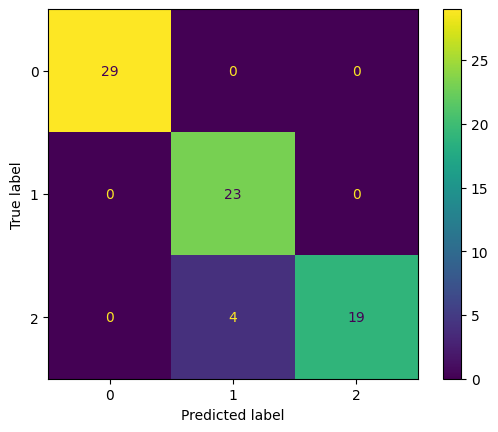

In [59]:
#혼동 행렬(confusion matrix) : 각 라벨에서 정답과 오답이 어디서 나왔는지 보여줌.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()#대각선은 정확히 맞춘 갯수. 비대각선은 틀린 갯수.

In [56]:
#분류 리포트(Classification Report) : 정밀도, 재현율 등 알려줌. 특정 클래스가 불균형한 경우에 유용함(환자vs일반인).
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.85      1.00      0.92        23
   virginica       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



## ✍️ 배운 점

- 로지스틱 회귀 모델은 약 100%의 정확도로 품종을 예측 가능함.
- 특히 petal length, petal width 특성이 중요하게 작용한 것으로 보입니다.


## 📌 다음 목표
- SVM, KNN 등 다른 모델도 비교 실습
## 💭궁금한 점 및 추가 정보



#### 1. 로지스틱 회귀 모델이란?
선형적 분류 모델에 사용.
빠르고 간단함.
비선형 문제는 풀기 어려움.
#### 2. Iris 같은 클래스로 정답이 나뉘는 데이터에서 잘 사용할 수 있는 모델?
| 모델| 특징 | 잘 맞는 경우 |
| --- | -- | -- |
| **KNN (K-최근접 이웃)**   | 가까운 데이터의 클래스를 따라감 | 단순하고 직관적. 거리 기반 |
| **SVM (Support Vector Machine)** | 데이터 경계에 최대 마진을 줌  | 분류 경계가 선형 or 커널로 확장 가능할 때     |
| **Decision Tree (의사결정나무)**   | 조건 분기를 따라 분류      | 해석이 쉬움. 비선형 분류 가능   |
| **Random Forest**    | 여러 결정트리를 조합  | 강력하고 안정적. 과적합에 강함 |
| **Naive Bayes**   | 확률 기반 분류 | 독립 가정이 대체로 성립할 때 (ex. 텍스트 분류) |
| **XGBoost / LightGBM**    | 부스팅 기반 고성능 모델     | 복잡한 문제에서 뛰어남    |

#### 3. 회귀 모델과 분류 모델의 차이점?
| 항목 | 회귀 (Regression) | 분류 (Classification) |
| -- | -- | -- |
| **출력값**   | 연속된 숫자 (실수)   | 범주 (클래스, 라벨)     |
| **예시**    | 키 예측, 주가 예측, 혈압 수치 | 고양이/강아지, 질병 유무, 이메일 스팸 여부 |
| **평가지표**  | MAE, MSE, RMSE, R² 등 | Accuracy, Precision, Recall, F1-score 등 |
| **모델 예시** | LinearRegression, SVR, RandomForestRegressor | LogisticRegression, SVM, RandomForestClassifier |

* Iris 모델은 클래스형 정답(`target` : 0,1,2)을 가지고 있기 때문에 분류 모델을 써야함! 회귀로 학습하는 경우 예측 값이 1.xx 같은 소수점으로 나올 수 있어 결과가 부정확해짐.
#### 4. 머신 러닝의 대표 모델들은?
| 유형 | 대표 알고리즘 | 설명 |
| -- | -- | -- |
| 분류 (Classification) | 로지스틱 회귀, SVM, KNN, 결정 트리, 랜덤 포레스트, Naive Bayes, XGBoost | 정답이 범주형 (고양이/강아지 등)      |
| 회귀 (Regression) | 선형 회귀, 릿지, 라쏘, 결정 트리 회귀, 랜덤 포레스트 회귀, SVR | 정답이 숫자형 (예: 집값 예측) |
| 클러스터링 (Clustering)     | K-Means, DBSCAN, 계층적 클러스터링| 정답(label) 없이 비슷한 것끼리 묶기  |
| 차원 축소 (Dim. Reduction) | PCA, t-SNE, UMAP| 고차원 데이터를 시각화하거나 압축 |
| 이상치 탐지    | Isolation Forest, One-Class SVM | 특이한 데이터를 탐지 |
| 딥러닝 (Neural Nets) | MLP, CNN, RNN, LSTM | 대규모/복잡한 데이터 (이미지, 텍스트 등) |

#### 5. 주어진 데이터셋에서 적합한 모델을 판단하는 방법?
1. y 값이 수치 → 분류 / 범주 → 회귀 결정
2. X 값의 구조를 시각화해보기 (pairplot, scatter 등)
3. 간단한 모델부터 실험한 후, 점점 복잡한 모델로 확장

**예시**
| 데이터셋 | 문제 유형 | 예측 목표 | 잘 맞는 모델 | 특징 |
| -- | -- | -- | -- | -- |
| **Iris** | 다중 분류 | 꽃 품종 (3종) | LogisticRegression, DecisionTree, KNN | 선형으로 잘 분리됨 |
| **Boston Housing** (구버전) | 회귀          | 집값 예측 | LinearRegression, RandomForestRegressor    | 입력 특성과 가격의 연속 관계         |
| **Titanic** | 이진 분류 | 생존 여부 (0/1)        | LogisticRegression, RandomForestClassifier | 일부 비선형 관계, 결측치 있음        |
| **MNIST** | 다중 분류 (이미지) | 숫자 0\~9            | CNN, RandomForest, SVM | 이미지 → 딥러닝 필수 |
| **California Housing** | 회귀 | 집값 (연속 값) | GradientBoosting, LinearRegression | 대용량 수치형 특성 |
| **Breast Cancer Wisconsin** | 이진 분류 | 암 악성/양성 | SVM, RandomForest, LogisticRegression      | 고차원 데이터, 변수 간 상호작용 있음    |
| **Wine Quality** | 회귀/분류 가능    | 와인 품질 점수 or 등급     | XGBoost, DecisionTree | 품질을 숫자나 클래스 양쪽으로 다룰 수 있음 |
| **Fashion MNIST** | 다중 분류 (이미지) | 옷 종류 (10종)         | CNN, SVM | 딥러닝 없이는 성능 낮음 |
| **Heart Disease** | 이진 분류       | 심장병 유무             | LogisticRegression, SVM | 비선형 분포 존재 |
| **Digits** | 다중 분류 | 숫자 0\~9 (작은 MNIST) | KNN, SVM, LogisticRegression | 작고 가벼워서 실습에 좋음           |
